In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv(r"C:\Users\annat\Downloads\Titanic-Dataset.csv")
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
#Data Information
print("\nMissing values before cleaning:")
print(df.isnull().sum())

print("\nDescriptive statistics:")
print(df.describe())



Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Descriptive statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean  

In [3]:
#Data Cleaning 
df['Age'].fillna(df['Age'].median(), inplace=True)
print(f"Missing 'Age' values after median imputation: {df['Age'].isnull().sum()}")

print(df['Embarked'].value_counts()) 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print(f"Missing 'Embarked' values after mode imputation: {df['Embarked'].isnull().sum()}")

df.drop('Cabin', axis=1, inplace=True)
print("Dropped 'Cabin' column due to too many missing values.")
print(f"Missing values after dropping 'Cabin':\n{df.isnull().sum()}")


Missing 'Age' values after median imputation: 0
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Missing 'Embarked' values after mode imputation: 0
Dropped 'Cabin' column due to too many missing values.
Missing values after dropping 'Cabin':
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\annat\AppData\Local\Temp\ipykernel_7076\2500818910.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\annat\AppData\Local\Temp\ipykernel_7076\2500818910.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa


Overall Survival Rate:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


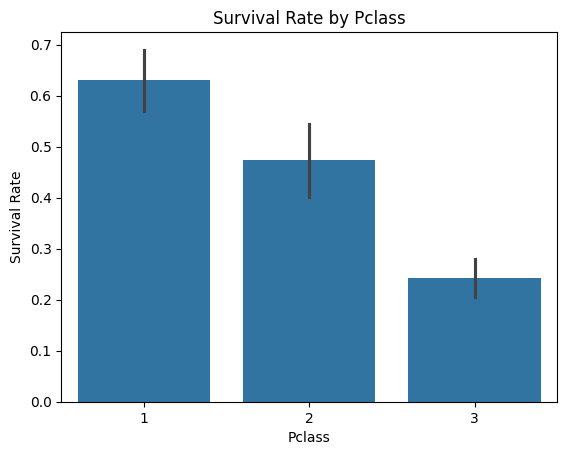

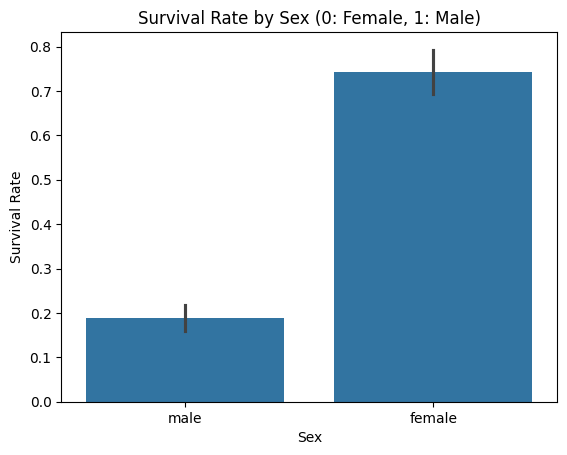

In [8]:
#EDA

print("\nOverall Survival Rate:")
print(df['Survived'].value_counts(normalize=True) * 100)

#Relationship between Pclass and survival rate 
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.ylabel('Survival Rate')
plt.show()

#Relationship between sex and survival rate
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex (0: Female, 1: Male)')
plt.ylabel('Survival Rate')
plt.show()